<a name="numpy">

<h2 id="numpy">Numpy </h2>

<p><a href="http://www.numpy.org/">numpy</a>(「ナンパイ」と読む)は、Pythonで科学技術計算のための中核となるライブラリです。これは、高性能の多次元配列オブジェクトを実装し、高速でメモリ効率のよい処理ツールを提供しています。MATLABに精通している人なら、
 <a href="http://wiki.scipy.org/NumPy_for_Matlab_Users">Matlabユーザーのための NumPyy</a>という文書から有用な情報が得られるでしょう。</p>
 
 <P> Numpyを使うには、まず次のようにしてnumpyパッケージをimport(取り込む）必要があります:</P>

In [3]:
import numpy as np

<a name="numpy-arrays"></a>

<h3 id="arrays">配列</h3>
<p>numpy配列はndarrayと呼ばれ、この名称はN次元配列オブジェクト(N-dimensional array)に由来しています。ndarrayの要素は、すべて同じ型の値でなければなりません。これがリストとの大きな違いの一つです。


まずndarrayの算術演算を紹介します。ndarrayに対する算術操作は、その配列要素すべてに作用します。

In [4]:
data = np.array([[1,2,3],[-1,-2,-3]])
print(data)

[[ 1  2  3]
 [-1 -2 -3]]


In [7]:
print(data * 10)
print(data / 5.0)
print(data + 0.5)

[[ 10  20  30]
 [-10 -20 -30]]
[[ 0.2  0.4  0.6]
 [-0.2 -0.4 -0.6]]
[[ 1.5  2.5  3.5]
 [-0.5 -1.5 -2.5]]


In [11]:
print(data + 0.1*data)

[[ 1.1  2.2  3.3]
 [-1.1 -2.2 -3.3]]


In [5]:
print(data * data)

[[1 4 9]
 [1 4 9]]


In [6]:
print(1.0/ data)

[[ 1.          0.5         0.33333333]
 [-1.         -0.5        -0.33333333]]


統計用の関数も用意されています。meanは平均、varは分散、stdは標準偏差を計算します。これらの用語については「確率と確率分布」で述べます。

In [17]:
#　平均
print(data[0].mean())  # ベクトルに対し計算。 np.mean(data[0]) でもよい
print(data.mean())   # 配列に対し計算。 np.mean(data) でもよい

# 分散
print(data[0].var()) # ベクトルに対し計算。 np.var(data[0]) でもよい
print(data.var())   # 配列に対し計算。 np.var(data) でもよい

# 標準偏差
print(data[0].std()) # ベクトルに対し計算。 np.std(data[0]) でもよい
print(data.std())   # 配列に対し計算。 np.std(data) でもよい

2.0
0.0
0.666666666667
4.66666666667
0.816496580928
2.16024689947


<p>ndarray配列には<t>shape</t>と<t>dtype</t>という属性があり、それぞれの配列ごとに固有の値を持ちます。<t>shape</t>は配列の次元数とそのサイズとのタプルです。<t>dtype</t>は配列の要素として期待される「型」を示します。</p>

In [15]:
print(data.shape)   # ２次元配列
print(data.dtype)   # 要素は整数

data2 = np.array([1.0, 2.0, 3.0])
print(data2.shape)  #  1次元配列
print(data2.dtype)  #  要素は浮動小数点数

(2, 3)
int64
(3,)
float64


<h4 id="ndarray-generation">ndarrayの生成</h4>
ndarray配列を作るにはいろいろな方法がありますが、一番簡単なのは今見たように、array関数を用いる方法です。
array関数は引数としてリストなど(専門用語を使えば、enumerate型のオブジェクト)を取ります。ただし、要素の型がすべて同じ場合に限るので、浮動小数点数と整数が混じっている場合には浮動小数点数に統一されます。

In [17]:
lst = [1, 2.3, 4.0, 5, 6]  # リスト
arr1 = np.array(lst)
print(arr1, arr1.shape, arr1.dtype)

(array([ 1. ,  2.3,  4. ,  5. ,  6. ]), (5,), dtype('float64'))


<p>入れ子になったリストからもndarray配列が作れます。</p>

In [21]:
lst2 = [[0,1,2], [3,4,5]]  
arr2 = np.array(lst2)
print(arr2, arr2.shape, arr2.dtype)

(array([[0, 1, 2],
       [3, 4, 5]]), (2, 3), dtype('int64'))


In [22]:
lst3 = [(0,1,2), (3,4,5)]  
arr3 = np.array(lst3)
print(arr3, arr3.shape, arr3.dtype)

(array([[0, 1, 2],
       [3, 4, 5]]), (2, 3), dtype('int64'))


In [25]:
lst4 = [(0,1,2), [3,4,5]]
arr4 = np.array(lst4)
print(arr4, arr4.shape, arr4.dtype)

(array([[0, 1, 2],
       [3, 4, 5]]), (2, 3), dtype('int64'))


<p>Numpyには、配列を作成するための関数が<t>array</t>以外にもたくさんあります。主要なものを表にし、例を示します。</p>

|関数|説明|
|:-|:-|
|array|引数にリスト、タプル、配列など列挙型のデータをとり、ndarrayを生成する。要素の型は推測、もしくは明示的に指定されたもの|
|asarray|arrayと同じくndarrayを生成するが、引数がndarrayの場合は新規には生成しない|
|arange|Python組み込みの関数rangeと同じ動作でndarrayを生成する|
|ones, ones_like|onesは指定されたサイズのndarrayを、指定されたdtypeで生成し、要素をすべて1とする。ones_likeは引数に別の列挙型オブジェクトを取り、それをテンプレートとして要素をすべて1としたndarray配列を生成する。|
|zeros, zeros_llike|要素を1ではなく0とすること以外は、onesおよびones_likeと同じ|
|empty, empty_like|要素を初期化せず不定であること以外は、onesおよびones_likeと同じ|
|eye, identity|NxNの単位行列となるndarray配列を生成する。|

In [ ]:
a = np.zeros((2,2))  # すべての要素が０である配列を作る
print( a )

In [ ]:
b = np.ones((1,2))   # すべての要素が1である配列を作る
print (b)

In [ ]:
c = np.full((2,2), 7) # 定数配列を作る
print (c)

In [ ]:
d = np.eye(2)        #  2x2 の単位行列を作る
print (d)


In [ ]:
e = np.random.random((2,2)) # 配列を作り、乱数で要素を埋める
print (e)

<p>配列の別な作成方法については
 <a href="http://docs.scipy.org/doc/numpy/user/basics.creation.html#arrays-creation">このドキュメント</a>を参照してください。</p>
 なお、乱数生成には numpyのrandomモジュールの方が randomモジュールよりもいろいろな関数が用意されています。

In [3]:
import random
print(len(dir(random)))
import numpy as np
print(len(dir(np.random)))

57
72


<a name="numpy-array-indexing"></a>

<h3 id="array-indexing">配列のインデックス</h3>
<p>Numpyでは、配列の要素を参照する方法がいろいろあります。これは奥が深いテーマです。</p>
<P>まず１次元ndarrayについてインデックス参照を見ていきましょう。これはPythonのリストの場合とよく似ています。</P>


In [10]:
arr = np.arange(10)   # array([0,1,2,3,4,5,6,7,8,9])


In [ ]:
print(arr[5])  

ndarrayから切り出した一部（スライス）を取り出すことができます。

In [ ]:
print(arr[5:8])

次はarr[5], arr[6], arr[7]の３つの要素それぞれに12という値を代入するものです。これを<b>ブロードキャスト</b>と呼びます。

In [12]:
arr[5:8] = 12
print(arr)

<P>Pythonのリストとndarrayの違いのひとつは、ndarrayのスライスは元のデータのコピーではなく元のデータを指している、ということです。つまりndarray配列のスライスに対する変更は元のndarray配列のに対する変更になります。これをリストと比較する形で示しましょう。</P>

In [ ]:
# Pythonのリスト
lst = list(range(10))
lst_slice = lst[5:8]
lst_slice[1] = 12
print(lst)
# ndarray
arr = np.array(np.arange(10))
arr_slice = arr[5:8]
arr_slice[1] = 12
print(arr)
arr_slice[:]=100
print(arr)

参考: コピーを作るには 次のようにcopy 関数を用います
<pre>
arr[5:8].copy()
</pre>

<P>2次元以上の多次元配列の場合、インデックス参照されるものがスカラー値ではなく配列になります。そのためインデックス参照の方法が増えます。</P>

In [21]:
arr2 = np.array([[0,1,2], [3,4,5], [6,7,8]] )
print(arr2[1])

[3 4 5]


したがって個々の要素を取り出すには、<T>arr2[1][2]</T>のように階層的にアクセする必要があります。
また次に見るように、もう少し簡単に表す方法もあります。

In [22]:
print(arr2[1][2], arr2[1,2], arr2[(1,2)])

(5, 5, 5)


<P>ndarray配列はスライス記法で部分配列を取り出せますが、配列のそれぞれの次元にスライスを指定することができます。</P>

In [23]:
# 次のような階数2で形状(3,4)の配列を作る
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# スライスを用いて最初の２行、１列目と２列目の要素からなる部分配列を抜き出す
#  b はそのような形状(2,2)の配列
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print (b)

[[2 3]
 [6 7]]


<P>配列の真ん中の行にあるデータにアクセスする2通リの方法を見ます。整数インデックスとスライスを混在させることで低い階数の配列ができます。一方、スライスだけを使うと、元の配列と同じ階数の配列ができます。</P>

In [25]:
row_r1 = a[1, :]    # 配列aの2行目に対する階数 1 のスライス
row_r2 = a[1:2, :]  # 配列aの2行目に対する階数 ２ のスライス
row_r3 = a[[1], :]  # 配列aの2行目に対する階数 ２のスライス
print (row_r1, row_r1.shape )
print (row_r2, row_r2.shape)
print (row_r3, row_r3.shape)

(array([5, 6, 7, 8]), (4,))
(array([[5, 6, 7, 8]]), (1, 4))
(array([[5, 6, 7, 8]]), (1, 4))


In [26]:
# 配列の列に対しても同じことが起こります
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print (col_r1, col_r1.shape)

print (col_r2, col_r2.shape)

(array([ 2,  6, 10]), (3,))
(array([[ 2],
       [ 6],
       [10]]), (3, 1))


<h4>整数インデックス：</h4><P>
スライスを使用してnumpyの配列にインデックスした結果は、常に元の配列の部分配列になります。これと対照的に、整数インデックスは、別の配列のデータを使用して任意の配列を構築することを可能にします。次に例を示します。</P>


In [28]:
a = np.array([[1,2], [3, 4], [5, 6]])

# 整数インデックスの例
# 返される配列は形状(3, )
print (a[[0, 1, 2], [0, 1, 0]] )

# 上の例は次のものと等価
print ( np.array([a[0, 0], a[1, 1], a[2, 0]]) )


[1 4 5]
[1 4 5]


In [27]:
# 整数インデックスを使えば、同じ配列の要素を使い回すことができる
print (a[[0, 0], [1, 1]])

# これは前のものと同じ
print (np.array([a[0, 1], a[0, 1]]))

[2 2]
[2 2]


<p>整数配列のインデックスが便利なのは、行列の各行から1つの要素を選択したり変更したりする場合です。</p>

In [30]:
# 要素を選んで配列を作る
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print (a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [31]:
# インデックスの配列を作る
b = np.array([0, 2, 0, 1])

# bのインデックスを用いてそれぞれの行からひとつずつ要素を選ぶ
print (a[np.arange(4), b] ) # "[ 1  6  7 11]"と出力


[ 1  6  7 11]


In [32]:
# bのインデックスを用いてそれぞれの行からひとつずつ要素の値を変化させる
a[np.arange(4), b] += 10
print (a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


<h4>ブール配列のインデックス</h4><P>
ブール配列インデックスを使用すると、配列の任意の要素を取り出すことができます。このタイプのインデックス参照は、ある条件を満たす配列の要素を選択するために頻繁に使用されます。次に例を示します。</P>


In [4]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # 2よりも大きな要素を見つける;
                    # これによりaと同じ形状のブール値のNumpy配列が返る
                    #  bool_idx のそれぞれの要素は
                    # 対応するaの要素が2より大きいかどうかの情報を与える

print (bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [34]:
# ブール配列インデックスbool_idxを用いて階数1の配列を作る
# bool_idxの要素がTrueである要素に対応するaの要素からなる
print (a[bool_idx])

# 以上の事を一行で完結に書くことができる:
print (a[a > 2])

[3 4 5 6]
[3 4 5 6]


<p>話を簡潔にするため、numpy配列のインデックス参照の詳細は省略しました。もっと知りたい場合は
 <a href="http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html">このドキュメント</a>を読みましょう。</p>

<a name="numpy-datatypes"></a>

<h3 id="datatypes">データ型</h3>
<p>numpy配列はすべて、同じ型の要素から構成されます。Numpyは、配列を構築するために使用できる多数の数値データ型を提供しています。Numpyは配列を作成するときにデータ型を推測しようとしますが、配列を構築する関数は通常、明示的にデータ型を指定するオプションの引数も含みます。次に例を示します。</p>

In [ ]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print (x.dtype, y.dtype, z.dtype)

<p>numpyのデータ型について詳しく知りたい場合は、
 <a href="http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html">このドキュメントの</a>を読むことをお勧めします。</p>

<a name="numpy-math"></a>

<h3 id="array-math">配列の数学</h3>
<p>基本的な数学関数は配列の要素ごとに作用し、暗黙的に拡張された演算子や、numpyモジュールの関数によって利用できます。</p>

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# 要素ごとの和；両方とも配列を返す
print (x + y)
print (np.add(x, y))


In [ ]:
# 要素ごとの差; どちらも配列を返す
print (x - y)
print (np.subtract(x, y))

In [ ]:
# 要素ごとの積; どちらも配列を返す
print (x * y)
print (np.multiply(x, y))

In [ ]:
# 要素ごとの商; どちらも配列を返す
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print (x / y)
print (np.divide(x, y))

In [ ]:
# 要素ごとの平方根; 配列を返す
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print (np.sqrt(x))

<p><code class="highlighter-rouge">*</code>はMATLABとは異なり、行列乗算ではなく、要素単位の乗算です。numpyでは、<code class="highlighter-rouge">dot</code>関数を使って、行列の積を計算したり、行列とベクトルの積を求めたり、ベクトルの内積を計算します。<code class="highlighter-rouge">dot</code>は、numpyモジュールの関数としても、配列オブジェクトのインスタンス・メソッドとしても利用できます。</p>

In [ ]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# ベクトルの内積計算; どちらも 219　を返す
print (v.dot(w))
print (np.dot(v, w))

In [ ]:
# 行列/ ベクトルの積; どちらも階数1 の配列 [29 67]　を返す
print (x.dot(v))
print (np.dot(x, v))

In [ ]:
# 行列 / 行列の積; どちらも階数 2 の配列を返す
# [[19 22]
#  [43 50]]
print (x.dot(y))
print (np.dot(x, y))

<p>Numpyは、配列の計算を実行するための多くの便利な関数を提供しています。<code class="highlighter-rouge">sum</code>は最も有用な関数の一つです。</p>

In [5]:
x = np.array([[1,2],[3,4]])

print (np.sum(x))   # すべての要素の総和を計算; "10"と表示する
print (np.sum(x, axis=0)) # 各列の総和を計算;  "[4 6]"と表示する
print (np.sum(x, axis=1))  # 各行の総和を計算; "[3 7]"と表示する

10
[4 6]
[3 7]


<p>numpyが提供する数学関数の完全なリストは
 <a href="http://docs.scipy.org/doc/numpy/reference/routines.math.html">このドキュメント</a>にあります。</p>

<p>配列を使用して数学関数を計算することとは別に、配列内のデータを再形成または操作する必要があることがよくあります。このタイプの操作の最も単純な例は行列を転置することですが、
これには単に配列オブジェクトの<code class="highlighter-rouge">T</code>属性を使えばできます：</p>

In [9]:
print (x)
print (x.T)
print(x.transpose())  # transpose関数を使ってもよい

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[[1 3]
 [2 4]]


In [7]:
v = np.array([[1,2,3]])
print ( v ) 
print (v.T)

[[1 2 3]]
[[1]
 [2]
 [3]]


もっとも行列クラスを使うと、転置行列だけではなく、逆行列を求めることもできる。

In [20]:
a = np.matrix('1 2 ; 3 4')    # 行列クラスのインスタンスを作成
#  a=np.matrix([[1, 2], [3, 4]])   でも同じ行列が得られる

print(type(a)) # matrixクラス
print(a)

print(a.T) # 転置

inv_a = a.I
print(inv_a) # 逆行列

print(a*inv_a) # 行列の乗算　--- 単位行列になるはず


<class 'numpy.matrixlib.defmatrix.matrix'>
[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]
[[  1.00000000e+00   1.11022302e-16]
 [  0.00000000e+00   1.00000000e+00]]


<a name="numpy-broadcasting"></a>

<h3 id="broadcasting">ブロードキャスト</h3>
<p>ブロードキャストはNumpyがいろいろな形状の配列に対し算術演算を許すような強力なメカニズムです。よくあるケースは、小さな配列と大きな配列があり、小さな配列を何回か大きな配列に対して演算する、という場合です。</p>

<p>例えば、行列のそれぞれの行にある定数ベクトルを加算したいとしましょう。それにはこのようにすればできます:</p>

In [ ]:
# ベクトルvを行列xの各行に加算する
# その結果を行列yとして記憶する
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # xと同じサイズの空の行列を作る

# ループを用いてvを行列xの各行に加える
for i in range(4):
    y[i, :] = x[i, :] + v

print( y )

<p>これはこれで動くのですが、行列 <code class="highlighter-rouge">x</code> がかなり大きい場合、
 Python の機能を使ってこのような繰り返しをやるととても遅くなります。ここで、ベクトル
<code class="highlighter-rouge">v</code> を行列
<code class="highlighter-rouge">x</code> の各行に足すというのは、
<code class="highlighter-rouge">v</code> のコピーを垂直にたくさん積み上げた行列
<code class="highlighter-rouge">vv</code> を作り、それから行列
 <code class="highlighter-rouge">x</code>と行列<code class="highlighter-rouge">vv</code>
    を要素ごとに足すことに等しいことに注目すると、この操作を次のように実現することができます:</p>


In [ ]:
vv = np.tile(v, (4, 1))  # vを４つ積み上げる
print (vv)               # 出力は: "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

In [ ]:
y = x + vv  # xとvvを要素ごとに加算する
print (y)

<p>Numpyのブロードキャストにより、 このような計算を、実際には<code class="highlighter-rouge">v</code>のコピーを作らずにすませることができます。 このような場合にブロードキャストを考えましょう:</p>

In [ ]:
import numpy as np

# ベクトルvを行列xの各行に加え
# その結果を行列yで記憶する
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # ブロードキャストを使ってvをxのそれぞれの行に足す
print (y)

<p> <code class="highlighter-rouge">y = x + v</code>は、 たとえ<code class="highlighter-rouge">x</code>が
<code class="highlighter-rouge">(4, 3)</code>という形状であり、 <code class="highlighter-rouge">v</code>
が<code class="highlighter-rouge">(3,)</code> という形状であっても、ブロードキャストのおかげで計算できます。
あたかも<code class="highlighter-rouge">v</code>が実際に<code class="highlighter-rouge">(4, 3)</code>という
形状をもっていて、各行がみな
<code class="highlighter-rouge">v</code>のコピーであるかのように、和が要素ごとに計算されるのです。</p>

<p>２つの配列に対するブロードキャストは次の規則に従います:</p>

<ol>
  <li>もしも配列が同じ階数でなければ、小さい階数の配列の形状に対し、両者の形状が同じ長さになるまで1を付け加える。</li>
  <li>２つの配列がある次元において「両立可能 <em>compatible</em>」 であるとは、
それらがその次元において同じサイズを持つか、どちらかがその次元のサイズが1の場合をいう。</li>
  <li>どの次元においても両立可能ならば、配列はともにブロードキャストが可能である。</li>
  <li>ブロードキャストにより、２つの入力配列は、それらのうち、次元ごとに最大の形状をもっているように振る舞う</li>
  <li>一方の配列がサイズ1で、もう一方の配列のサイズが1よりも大きい場合、前者の配列はその次元にそってコピーされたかのように振る舞う。
    </li>
</ol>

<p>もしもこの説明で意味がわからなければ、
<a href="http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html">この解説</a>か、
<a href="http://wiki.scipy.org/EricsBroadcastingDoc">こちらの解説</a>を読んでみよう。</p>

<p>ブロードキャストができる関数は <em>汎化関数</em>と呼ばれている。どんなものがそうかは、
<a href="http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs">このドキュメント</a>
を参照すること.</p>

<p>以下に、ブロードキャストの使用例をいくつか示す:</p>


In [ ]:
import numpy as np

# ベクトルの外積計算
v = np.array([1,2,3])  # v の形状 (3,)
w = np.array([4,5])    # w の形状 (2,)
# 外積を計算するには、まずvの形状を変えて、
# 形状 (3, 1)の列ベクトルにする; 次にこれをwに対してブロードキャストし、
# 形状 (3, 2)の出力を得る。これが v と wの外積である
# [[ 4  5]
#  [ 8 10]
#  [12 15]]
print (np.reshape(v, (3, 1)) * w)

# ベクトルを行列のそれぞれの「列」に加える
x = np.array([[1,2,3], [4,5,6]])
# x は形状 (2, 3) で v は形状 (3,) であるから、それらをブロードキャストし
# 次のような形状 (2, 3)の行列を得る
# [[2 4 6]
#  [5 7 9]]
print (x + v)

# ベクトルを行列の各「行」に加える
# 行列x は形状 (2, 3) で、 w は形状 (2,)である。
# 行列 x を転置すると形状(3, 2) となり、これをwに対しブロードキャストすることで
# 形状(3, 2)の行列を得る;この結果を転置することで
# 形状 (2, 3)の行列を最終結果として得る。これは行列xの各列に
# ベクトル w を加えたものになっており、結果は:
# [[ 5  6  7]
#  [ 9 10 11]]
print ( (x.T + w).T )
# 別解:  wの形状を形状 (2, 1)のベクトルに変えると
# これを行列 x にブロードキャストして、同じ結果を得る
print (x + np.reshape(w, (2, 1)))

# 行列の定数倍:
# x は形状(2, 3) の行列とする. Numpy ではスカラーは形状 ()のベクトル扱いである
# これらは一緒にブロードキャストされ、形状(2, 3)の次の行列を得る:
# [[ 2  4  6]
#  [ 8 10 12]]
print (x * 2)

<p>ブロードキャストを使うと、一般にコードが簡潔でしかも処理速度が速くなります。
ですから、可能な限りこれを使うよう、努めてください。</p>

<h3 id="numpy-documentation">Numpyのドキュメント</h3>
<p>この短い文書では、知らなければならない重要なことのホンのさわりしか紹介できていないので、
<a href="http://docs.scipy.org/doc/numpy/reference/">numpyの文献</a>
を読んで、Numpyについて、よりよく知る努力をしてください。</p>

<p><a name="scipy"></a></p>

<h2 id="scipy">SciPy</h2>
<p>Numpyは高性能、多次元の配列を提供し、かつその配列の基本ツールや処理機能を提供している。

<a href="http://docs.scipy.org/doc/scipy/reference/">SciPy</a>はNumpyをベースに、
その配列を用いた多くの関数や、いろいろな科学技術応用を提供している。</p>

<p> SciPyをよりよく知るには
<a href="http://docs.scipy.org/doc/scipy/reference/index.html">このドキュメント</a>を見てほしい。
ここではSciPyについて役に立つほんの一部について紹介する。</p>

<p><a name="scipy-image"></a></p>

<h3 id="image-operations">画像処理</h3>
<p>SciPyは画像を扱う基本関数を提供している。たとえば、 
ディスクから画像を読み込みNumpyの配列に取り込んだり、その配列を画像としてディスクに書き込んだり、
画像のサイズを変えたりする関数がある。ここではそのような関数のいくつかを紹介しよう。
</p>

In [ ]:
from scipy.misc import imread, imsave, imresize

# JPEG 画像ファイルを読み込み、numpy の配列として記憶する
img = imread('assets/cat.jpg')
print( img.dtype, img.shape ) # "uint8 (400, 248, 3)" と出力する

# 色のチャネルごとにいろいろな定数を掛けてスケーリングすることで
# 画像に色合いをつけることができる。この画像の形状は(400, 248, 3)である
# これに形状(3,) の定数ベクトル[1, 0.95, 0.9] をNumpyのブロードキャスト
# する。つまり赤色(第１チャネル)は変化させないが、緑(第２チャネル)と青
# （第３チャネル）の大きさをそれぞれ0.95倍、および0.9倍する

img_tinted = img * [1, 0.95, 0.9]

# 結果の画像を 300 x 300 ピクセルになるようサイズを変更する
img_tinted = imresize(img_tinted, (300, 300))

# この画像をディスクに書き込む
imsave('assets/cat_tinted.jpg', img_tinted)


<p><a name="scipy-matlab"></a></p>

<h3 id="matlab-files">MATLAB ファイル</h3>
<p><code class="highlighter-rouge">scipy.io.loadmat</code> と<code class="highlighterrouge">scipy.io.savemat</code>関数を使うと、  MATLABのファイルの読み書きができます。
これについては
<a href="http://docs.scipy.org/doc/scipy/reference/io.html">このドキュメント</a>をご覧ください.</p>

<p><a name="scipy-dist"></a></p>

<h3 id="distance-between-points">座標間の距離</h3>
<p>SciPyは、点（座標）の集合の間の距離を計算するための有用な関数を用意しています、</p>

<p>関数 <code class="highlighter-rouge">scipy.spatial.distance.pdist</code>は、
集合中のすべての点と点のペアの間の距離を計算します</p>



In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# 各行が2D空間における点となっている配列を作る:
# [[0 1]
#  [1 0]
#  [2 0]]
x = np.array([[0, 1], [1, 0], [2, 0]])
print (x)

# xのすべての行の間のユークリッド距離を計算する 
# d[i, j] は x[i, :] と x[j, :]　の間の距離となる
# 結果は次:
# [[ 0.          1.41421356  2.23606798]
#  [ 1.41421356  0.          1.        ]
#  [ 2.23606798  1.          0.        ]]
d = squareform(pdist(x, 'euclidean'))
print (d)

<p>この関数については
<a href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html">この文書</a>
で詳細を調べてください。</p>

<p>似たような関数として (<code class="highlighter-rouge">scipy.spatial.distance.cdist</code>) がある。
これは２つの点集合のすべての組み合わせに対して距離を計算する。これについては
<a href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html">この文書</a>
を参照のこと.</p>


<h1><a name="matplotlib"></a></h1>

<h2 id="matplotlib">Matplotlib</h2>
<p><a href="http://matplotlib.org/">Matplotlib</a>は、描画のためのライブラリです。
ここでは、 <code class="highlighter-rouge">matplotlib.pyplot</code>モジュールについて簡単に紹介します。
これは、MATLABの描画機能と類似のシステムを提供しています。</p>

<p><a name="matplotlib-plot"></a></p>

<h3 id="plotting">プロット</h3>
<p>matplotlibで最も重要な関数が <code class="highlighter-rouge">plot</code>です。これにより
2Dデータをプロットすることができます。例を示します:</p>

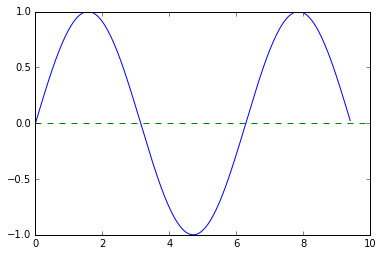

In [18]:
%matplotlib inline
# 上により、matplotlibで作成した図がブラウザ上に表示されるようになる

import numpy as np
import matplotlib.pyplot as plt

# x座標に対するsin関数の値を計算しy座標の値とする
x = np.arange(0, 3 * np.pi, 0.05)
y = np.sin(x)

# x軸を引く
plt.axhline(y=0, xmin=min(x), xmax=max(x), color='green',linestyle='dashed')

# matplotlibを使ってプロットする
plt.plot(x, y)
plt.show()  # 本来はこの plt.show() を呼ばなければ図が見えない

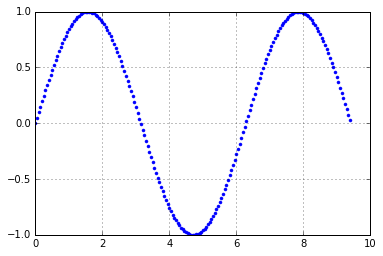

In [19]:
# sin関数を散布図として表示する
x = np.arange(0, 3 * np.pi, 0.05)
y = np.sin(x)
plt.plot(x,y,'b.') # 第3引数に色(Blue)とマーカーの種類を指定すると散布図となる
plt.grid()     # 枠線を書く
plt.show()

<p>ちょっとだけ余計に作業することで、簡単にいくつもの線を同時に描画したり、題目をつけたり、
凡例をつけたり、軸のラベルをつけたりできます:</p>

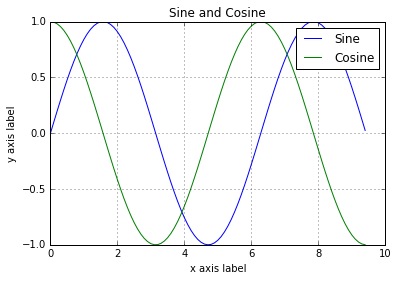

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# x座標に対するsin関数の値を計算しy座標の値とする
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# matplotlibを使ってプロットする
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')  # ラベルに日本語は使えないと思って良い
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.grid()
plt.show()     # 　これを最後に呼ぶこと

<p> <code class="highlighter-rouge">plot</code> 関数について、詳しくは
<a href="http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot">この文書</a>をご覧ください</p>


<p><a name="matplotlib-subplots"></a></p>

<h3 id="subplots">Subplot</h3>
<p>いろいろな図を同じ画面に表示するには<code class="highlighter-rouge">subplot</code>関数を使います。
次の例をみてください:</p>

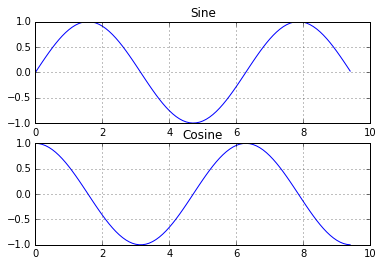

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# x座標に対応するsinとcos関数の値を計算する 
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# subplotの枠を設定：高さ２、幅１とする,
# そして、最初の枠をactiveにする
plt.subplot(2, 1, 1)

# 最初の図を描画する
plt.plot(x, y_sin)
plt.title('Sine')
plt.grid()

# ２番めの枠をactiveにして、別な図を描画する
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')
plt.grid()

# 図を表示する(これを最後に呼ぶこと)
plt.show()

<p> <code class="highlighter-rouge">subplot</code> 関数について、詳しくは
<a href="http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot">この文書</a>をご覧ください</p>



<p><a name="matplotlib-images"></a></p>

<h3 id="images">画像</h3>



`imshow`関数を使って画像を表示できます。次の例をみてください。ただし以下を実行するには
<A HREF="http://lang.sist.chukyo-u.ac.jp/Classes/PythonProbStat/assets.zip">assets.zip</A>をダウンロードし展開しておくこと

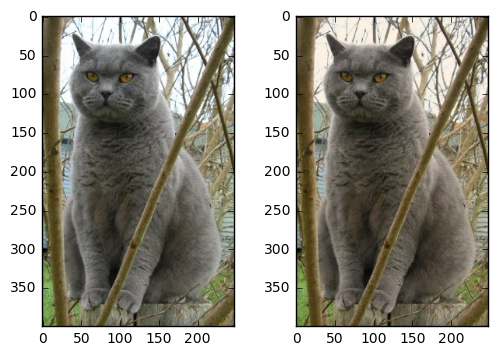

In [5]:
import numpy as np
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt

img = imread('assets/cat.jpg')
img_tinted = img * [1, 0.95, 0.9]

# 原画像を表示
plt.subplot(1, 2, 1)
plt.imshow(img)

# 色を変えた画像を表示
plt.subplot(1, 2, 2)

# A slight gotcha with imshow is that it might give strange results
# if presented with data that is not uint8. To work around this, we
# explicitly cast the image to uint8 before displaying it.
plt.imshow(np.uint8(img_tinted))
plt.show()

---
## 練習問題
1. 乱数を用いて、3x3の行列を作れ。要素はすべて乱数によって生成された値とする。この行列を**変数Aの値とせよ**。
     つぎに、np.linalg.matrix_rank 関数にて行列Aの階数を求めよ。ここでもしも階数が3でなければAが正則行列でない（つまり逆行列が存在しない）ので、最初からやり直しすること。

In [ ]:
# 問題1

 2. 前問で設定した変数Aの値(行列)に対し、**その逆行列を求め変数Ainvの値とせよ**。そして、**AとAinvの(行列)積が単位行列になることを確かめよ**。

In [ ]:
# 問題2

<BR>3. 行列の固有値と固有ベクトルは次のようにして求めることができる（参考:<A HREF="http://qiita.com/kenmatsu4/items/2a8573e3c878fc2da306" target="_blank">固有値、固有ベクトルを可視化する</A>)

```
# Mを行列とする
eigenVals, eigenVecs = np.linalg.eig(M)   # eigenValsが固有値、eigenVecsが固有ベクトルの行列
```

これに基づき、**Aの値である行列の固有値と固有ベクトルを求めよ**。（注意: 固有ベクトルは、固有ベクトルの行列の「列」ベクトルである)

In [ ]:
# 問題3

<BR>4. 3x3の行列に対し、固有値とそれに対応する固有ベクトルは三組ある。
元の行列を$\mathbf{A}$、 固有値と対応する固有ベクトルをそれぞれ $\lambda$と$\mathbf{x}$ と書くと、 $\mathbf{Ax}=\lambda\mathbf{x}$ が成り立つこと、また固有ベクトルがみな正則化されている(長さが1)であることも確認せよ。
ただし固有値が実数のものだけに限定するとする(つまり固有値が複素数のものは除外する)・

In [ ]:
# 問題4

<BR>5. 次を実行し、散布図をmatplotlibを用いて以下のような図を表示せよ。
      <pre>
x=np.array([2.8, 2.9, 3.0, 3.1, 3.2, 3.2, 3.2, 3.3, 3.4])
y=np.array([30,26,33,31,33,35,37,36,33])
</pre>
<IMG src="plot1.png" />


In [ ]:
# 問題5

<BR>6. 最小二乗法を用いて、上記のxとyの関係を近似する線形関数$y = ax + b$を求めよう（つまり、傾き$a$と切片$b$を求める）。<BR>
    これは、上記のデータを$x_i, y_i$ (i=1,..,9)とおくと、
    $ \left( \begin{array}{r} a \\ b \end{array} \right) = 
    \left( \begin{array}{rr} \sum_i x_i^2 & \sum_i x_i \\ \sum_i x_i & \sum_i 1 \\ \end{array} \right)^{-1}
              \left( \begin{array}{r} \sum_i x_i y_i \\ \sum_i y_i \end{array} \right) $
              という式から得られる。これによって近似線形関数を求め、上の図にその直線を書き込め。次のような図が得られれば良い。
             <IMG src="plot2.png" />
    注意: 上記を満たす関数は後で学ぶ。ここでは上記の方法にしたがって解いてみよ。<BR>
    直線は両端の2点を与えてplotすればよい。例えば`plt.plot([0,1],[0,10],'g')`で(0,0)と(1,10)を結ぶ直線がひける

In [ ]:
# 問題6